<a href="https://colab.research.google.com/github/yiyangww/Machine-Learning-Fundamentals/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def kmeans(data, k, iterations):
    # initialize k random centroids
    centroids = data[np.random.choice(data.shape[0], k, replace = False)]
    for _ in range(iterations):
        # claculate distance between points to centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis = 2)

        # assign points to nearest clusters
        clusters = np.argmin(distances, axis = 1)

        # update centroids
        new_centroids = np.array([data[clusters == i].mean(axis = 0) for i in range(k)])

        # check if converage
        if np.allclose(new_centroids,centroids):
            break
        centrodis = new_centroids

        return centrodis, clusters

In [ ]:
# Q1.2
# try the k's from 2 to 7
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
k_values = range(2, 8)
max_iters = 1000
for k in k_values:
    centroids, clusters = kmeans(data.data, k , max_iters)

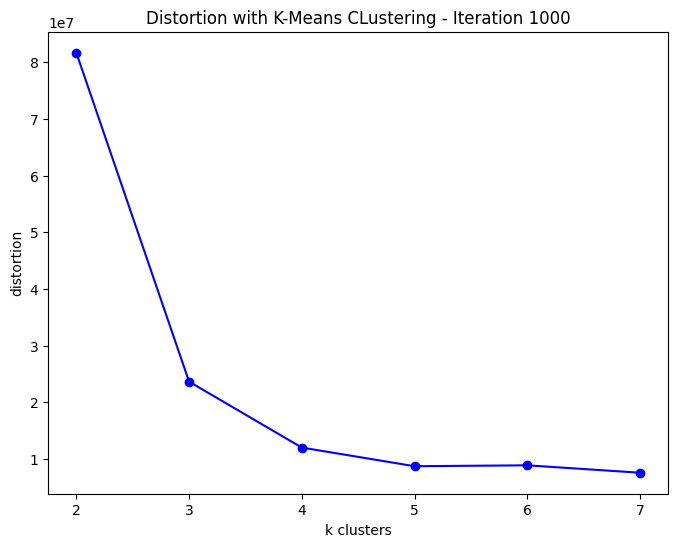

In [ ]:
# Q1.3
import matplotlib.pyplot as plt

def compute_distortion(data, centroids, clusters):
    distortion = 0
    n = len(centroids)
    for i in range(n):
        cluster_points = data[clusters == i]
        distortion += np.sum((cluster_points - centroids[i]) ** 2)
    return distortion/n

distortion_values = []
for k in k_values:
    centroids, clusters = kmeans(data.data, k , max_iters)
    distortion = compute_distortion(data.data, centroids, clusters)
    distortion_values.append(distortion)

plt.figure(figsize=(8, 6))
plt.plot(k_values, distortion_values, c = 'blue', marker = 'o')
plt.title('Distortion with K-Means CLustering - Iteration {0}'.format(max_iters))
plt.xlabel('k clusters')
plt.ylabel('distortion')
plt.show()

In [ ]:
# Q1.4
# We use elbow method to choose the appropriate k value.
# Accorading to the plot, k at 3 or 4 are inflection points which means 3 can an an optimal choice, 4 as well